# Project ML Classification models

*Filip Jovanović, Karlo Džafić, Karlo Veršić*



## About the data
description taken [Kaggle](https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task)

-Bank Client Data:
1. age (numeric)
2. job : Type of job (categorical:
 "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: Has credit in default? (binary: "yes","no")
6. balance: Average yearly balance, in euros (numeric)
7. housing: Has housing loan? (binary: "yes","no")
8. loan: Has personal loan? (binary: "yes","no")
- Related with the Last Contact of the Current Campaign:
9. contact: Contact communication type (categorical: "unknown","telephone","cellular")
10. day: Last contact day of the month (numeric)
11. month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: Last contact duration, in seconds (numeric)
- Other Attributes:
13. campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)
15. previous: Number of contacts performed before this campaign and for this client (numeric)
16. poutcome: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
- Output Variable (Desired Target):
17. y - Has the client subscribed to a term deposit? (binary: "yes","no")

## Dataset Information
### Additional Information
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

### Classification Goal
The goal is to predict if the client will subscribe (yes/no) to a term deposit (variable y). Using various classification models and features of this dataset the main goal of this project will be to find a great predictive model for this bank data set.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix,precision_score, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn import metrics
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

After we import all the libraries that we might need, we need to do a quick data analysis:
1. Is there any null or missing values
2. Information about data - which columns are categorical and which are numerical
3. Check if there is any duplicated data
4. How do we encode our categorical variables
5. See the correlation between features and correlation between features and target column
6. We also check skewness of the feature columns 
7. Target column value balance needs to be checked as well

In [3]:
data = pd.read_csv('data/bank_data.csv')
data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
data.isnull().value_counts()

Unnamed: 0  age    job    marital  education  default  balance  housing  loan   contact  day    month  duration  campaign  pdays  previous  poutcome  y    
False       False  False  False    False      False    False    False    False  False    False  False  False     False     False  False     False     False    4521
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [6]:
data.duplicated().value_counts()

False    4521
Name: count, dtype: int64

In [7]:
data = data.drop(columns='Unnamed: 0',axis=1)
data.replace({'yes':1,'no':0}, inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [8]:
print(data.marital.unique(), data.columns.get_loc('marital'))
print(data.education.unique(), data.columns.get_loc('education'))
print(data.contact.unique(), data.columns.get_loc('contact'))
print(data.month.unique(), data.columns.get_loc('month'))
print(data.poutcome.unique(), data.columns.get_loc('poutcome'))
print(data.job.unique(), data.columns.get_loc('job'))

['married' 'single' 'divorced'] 2
['primary' 'secondary' 'tertiary' 'unknown'] 3
['cellular' 'unknown' 'telephone'] 8
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec'] 10
['unknown' 'failure' 'other' 'success'] 15
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 1


In [9]:
y = data['y']
X = data.drop(columns=['y'],axis=1)

In [10]:
le = LabelEncoder()
le.fit(['unknown', 'primary', 'secondary', 'tertiary'])
X['education'] = le.transform(X['education'])

le = LabelEncoder()
le.fit(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
X['month'] = le.transform(X['month'])

X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,0,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown
1,33,services,married,1,0,4789,1,1,cellular,11,8,220,1,339,4,failure
2,35,management,single,2,0,1350,1,0,cellular,16,0,185,1,330,1,failure
3,30,management,married,2,0,1476,1,1,unknown,3,6,199,4,-1,0,unknown
4,59,blue-collar,married,1,0,0,1,0,unknown,5,8,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,1,0,-333,1,0,cellular,30,5,329,5,-1,0,unknown
4517,57,self-employed,married,2,1,-3313,1,1,unknown,9,8,153,1,-1,0,unknown
4518,57,technician,married,1,0,295,0,0,cellular,19,1,151,11,-1,0,unknown
4519,28,blue-collar,married,1,0,1137,0,0,cellular,6,3,129,4,211,3,other


In [11]:
X = pd.get_dummies(X, drop_first=True).astype(int)
X

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,10,79,1,...,0,1,0,1,0,0,0,0,0,1
1,33,1,0,4789,1,1,11,8,220,1,...,0,0,0,1,0,0,0,0,0,0
2,35,2,0,1350,1,0,16,0,185,1,...,0,0,0,0,1,0,0,0,0,0
3,30,2,0,1476,1,1,3,6,199,4,...,0,0,0,1,0,0,1,0,0,1
4,59,1,0,0,1,0,5,8,226,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,-333,1,0,30,5,329,5,...,0,0,0,1,0,0,0,0,0,1
4517,57,2,1,-3313,1,1,9,8,153,1,...,0,0,0,1,0,0,1,0,0,1
4518,57,1,0,295,0,0,19,1,151,11,...,1,0,0,1,0,0,0,0,0,1
4519,28,1,0,1137,0,0,6,3,129,4,...,0,0,0,1,0,0,0,1,0,0


In [12]:
data1= X.copy()
data1 = data1.join(y)

<Axes: >

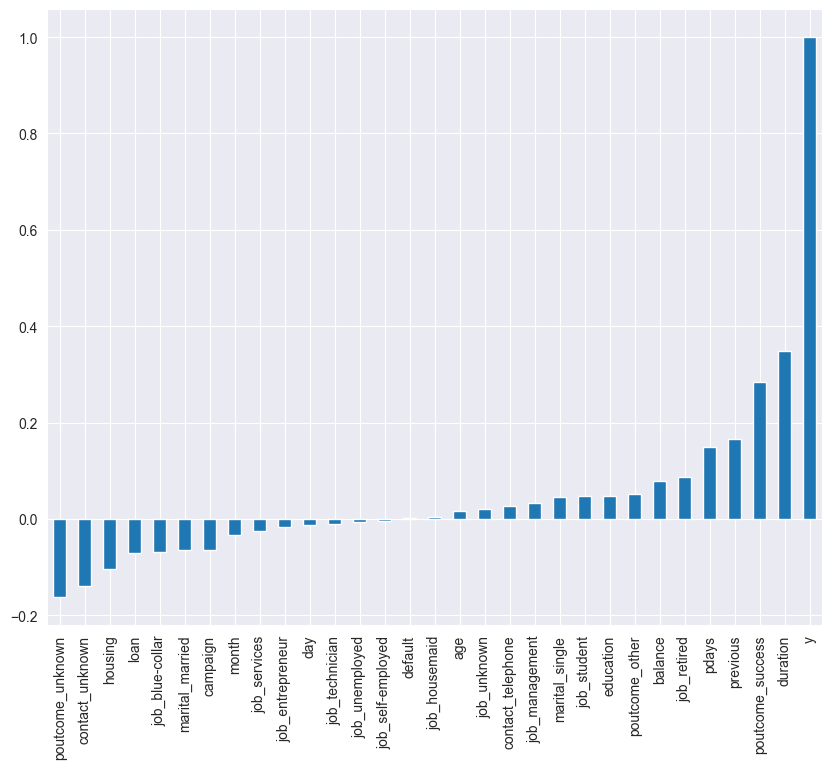

In [13]:
corelations = data1.corr(method='spearman')['y'].sort_values()
corelations.plot(kind='bar', figsize=(10,8))

In [14]:
data1.corr(method='spearman').sort_values(by=['y'], ascending=False)['y']

y                    1.000000
duration             0.348439
poutcome_success     0.283481
previous             0.165333
pdays                0.150179
job_retired          0.086675
balance              0.078982
poutcome_other       0.051908
education            0.048077
job_student          0.047809
marital_single       0.045815
job_management       0.032634
contact_telephone    0.025878
job_unknown          0.019886
age                  0.016271
job_housemaid        0.004872
default              0.001303
job_self-employed   -0.003827
job_unemployed      -0.007312
job_technician      -0.010154
day                 -0.011811
job_entrepreneur    -0.015968
job_services        -0.024071
month               -0.032639
campaign            -0.064612
marital_married     -0.064643
job_blue-collar     -0.068147
loan                -0.070517
housing             -0.104683
contact_unknown     -0.139399
poutcome_unknown    -0.162038
Name: y, dtype: float64

<Axes: >

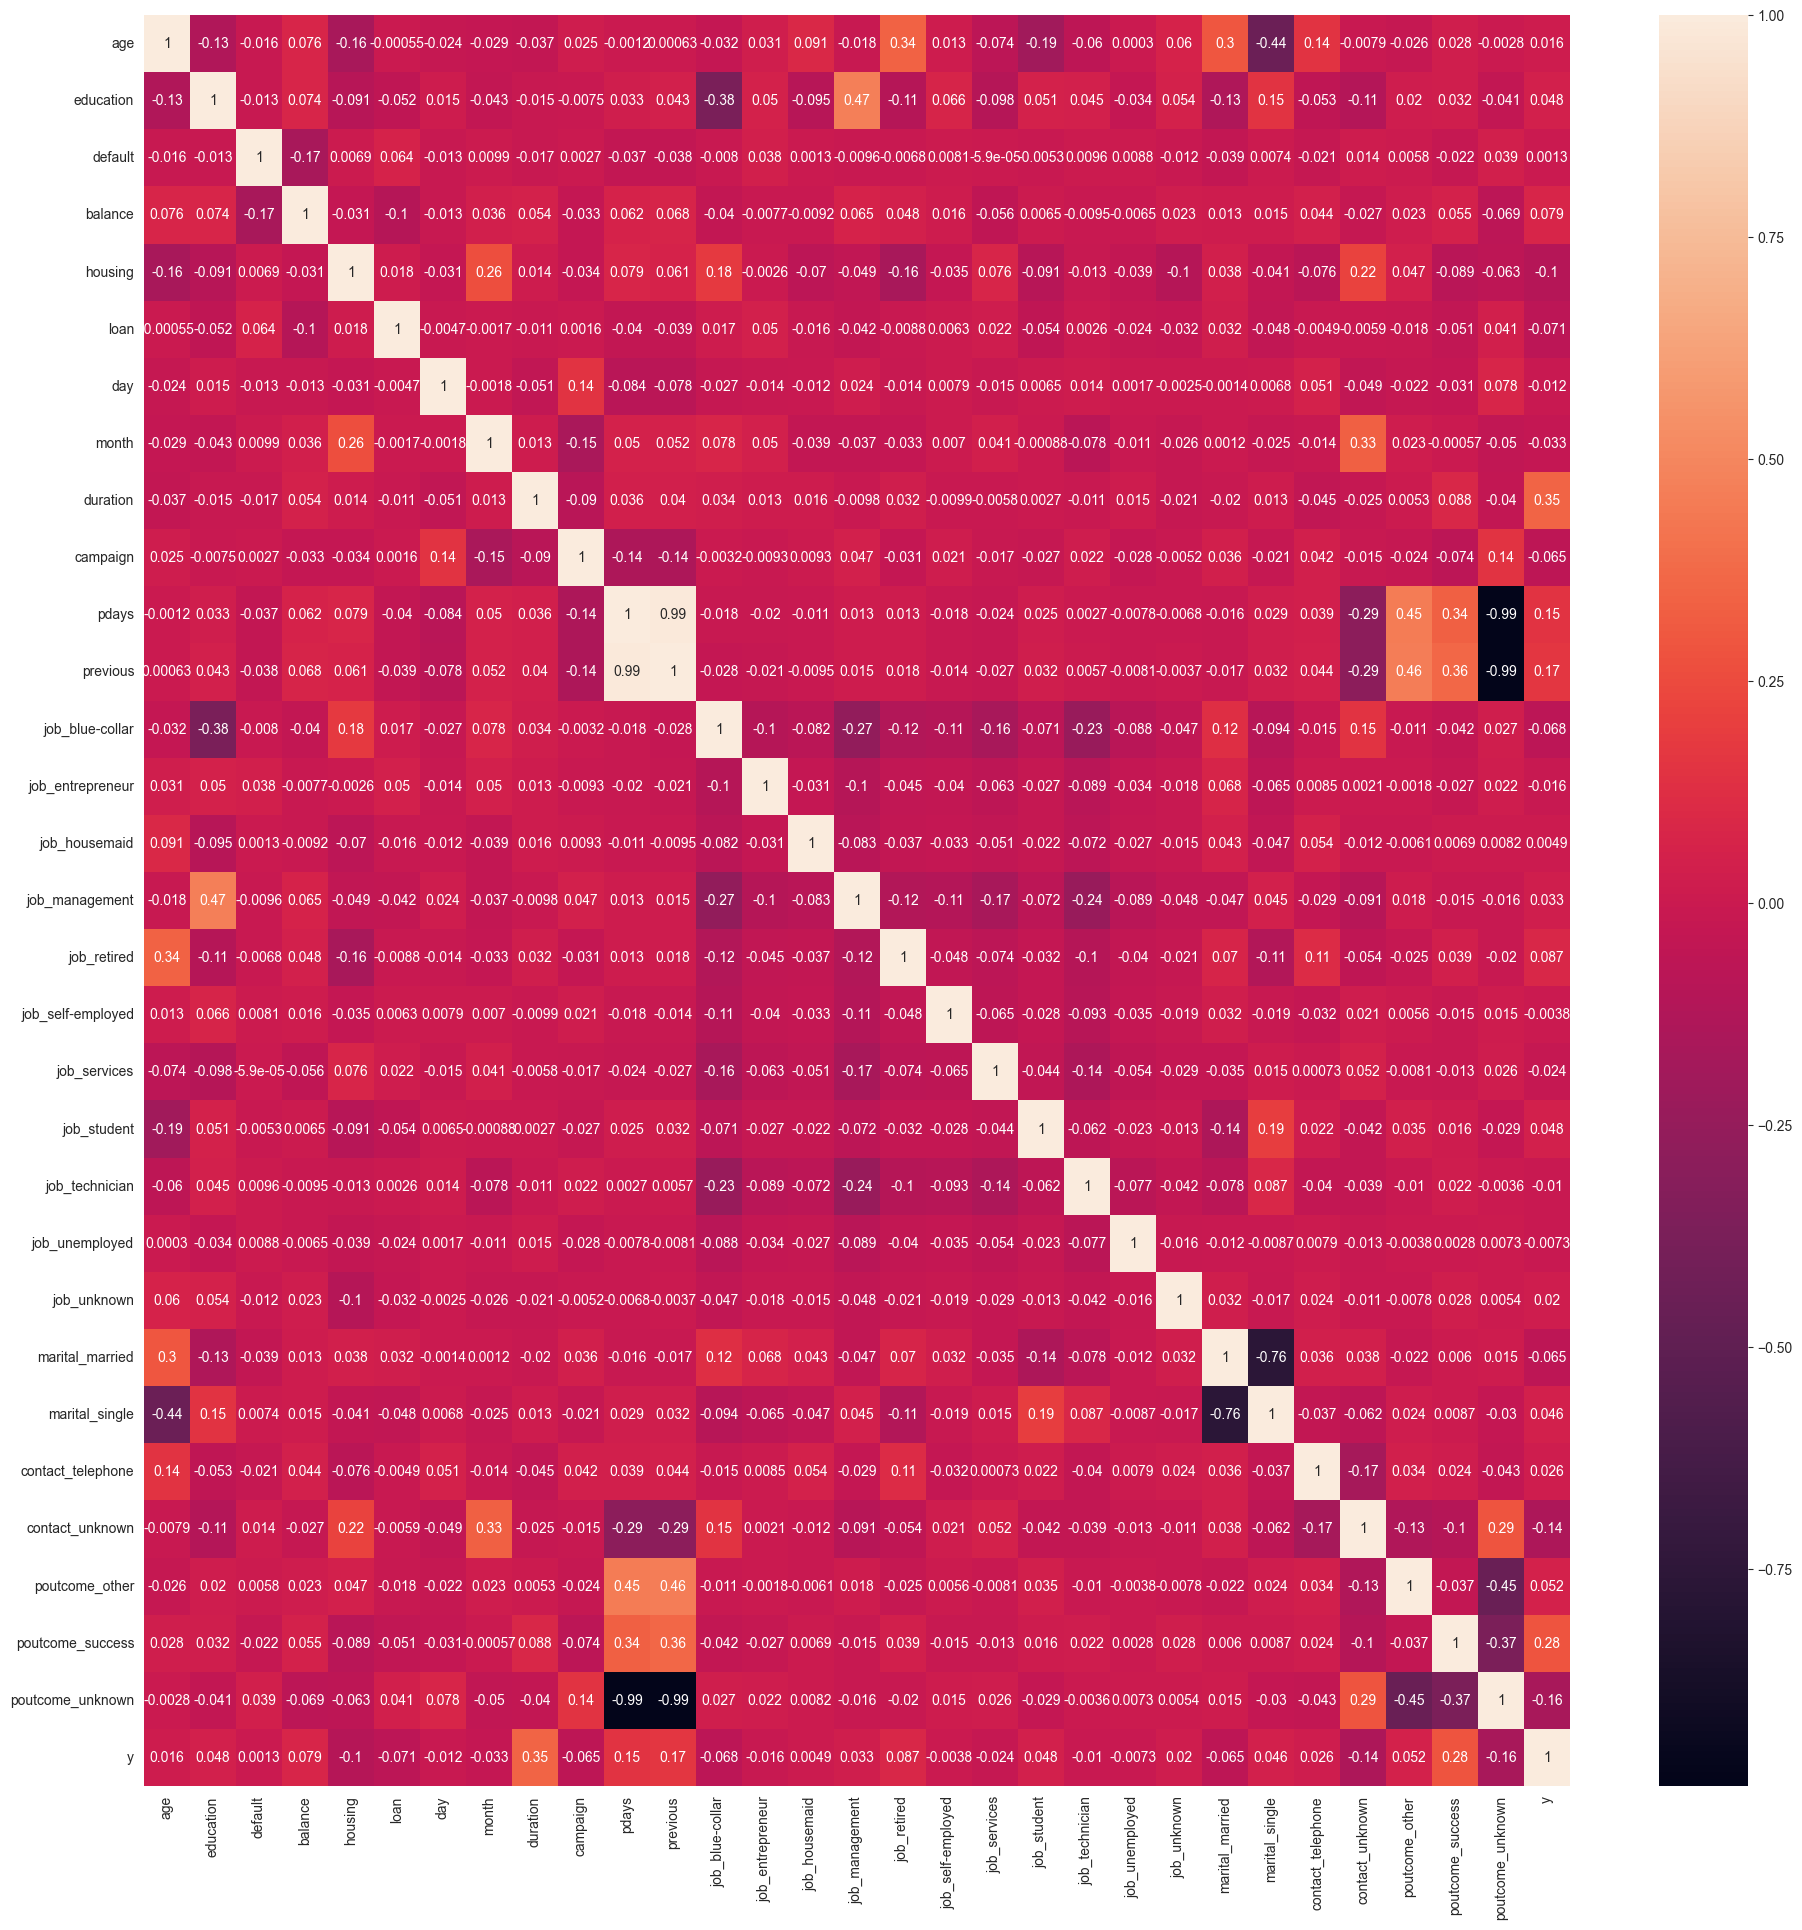

In [15]:
plt.figure(figsize=(23,23))
sns.heatmap(data=data1.corr(method='spearman'), annot=True)

# Check for unbalanced data and skewness


<Axes: xlabel='y'>

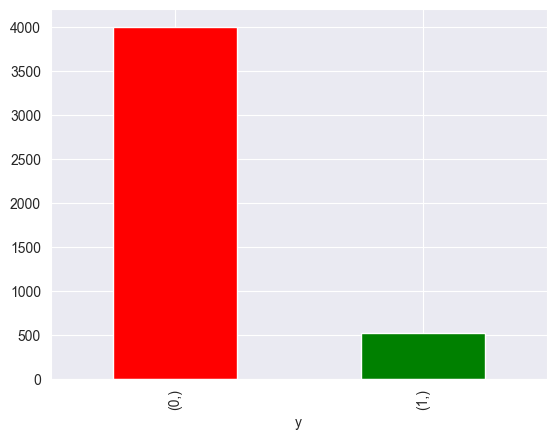

In [16]:
data[['y']].value_counts().plot(kind='bar',color=['red', 'green'])

In [17]:
skew_cols = pd.DataFrame()
sk = pd.DataFrame()
skew_cols['skew'] = (abs(X.skew()).sort_values(ascending=False) >= 0.75)
sk = skew_cols.T
sk

,job_unknown,default,job_student,balance,job_housemaid,previous,job_unemployed,poutcome_success,job_entrepreneur,campaign,...,job_blue-collar,job_management,marital_single,contact_unknown,age,month,marital_married,housing,education,day
skew,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False


In [18]:
sk = sk.loc[:, sk.all()]
sk = sk.columns
sk

Index(['job_unknown', 'default', 'job_student', 'balance', 'job_housemaid',
       'previous', 'job_unemployed', 'poutcome_success', 'job_entrepreneur',
       'campaign', 'job_self-employed', 'poutcome_other', 'job_retired',
       'contact_telephone', 'job_services', 'duration', 'pdays', 'loan',
       'job_technician', 'poutcome_unknown', 'job_blue-collar',
       'job_management', 'marital_single', 'contact_unknown'],
      dtype='object')

Above we can see columns with skewness above 0.75. We can't log or sqrt transform them due to them not having all positive values.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<Axes: xlabel='y'>

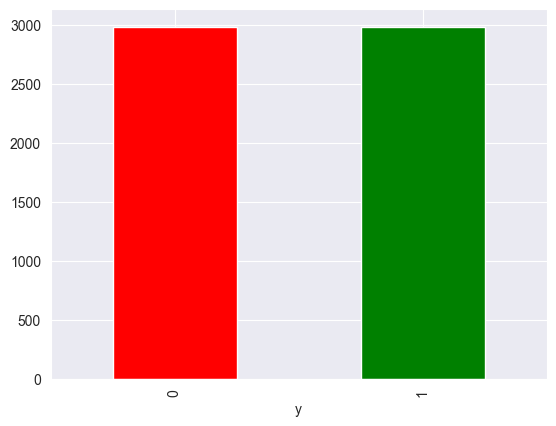

In [20]:
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train,y_train)
y_train.value_counts().plot(kind='bar', color=['red', 'green'])

`get_scores()` function is a helper function that we can use to easily 'grade' predictions from different models. This function plots confusion matrix for each model to visualise predictions compared to actual target values. 

In [21]:
def get_scores(p,t, model):
    prec, rec, fscore, _ = precision_recall_fscore_support(p,t, average='weighted')
    acc = accuracy_score(p,t)
    print('for model: \n')
    display(model)
    print('Precision: ' + str(prec) + '\nRecall: ' + str(rec) + '\nF-score: ' + str(fscore) + '\nAccuracy: ' + str(acc))
    sns.set_palette(sns.color_palette())
    
    _, ax = plt.subplots(figsize=(8,8))
    ax = sns.heatmap(confusion_matrix(p, t), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
    labelsy = ['Positive', 'Negative']
    labelsx = ['Positive', 'Negative']
    ax.set_xticklabels(labelsx, fontsize=25)
    ax.set_yticklabels(labelsy, fontsize=25)
    ax.set_ylabel('Prediction', fontsize=30)
    ax.set_xlabel('Ground Truth', fontsize=30)

# BOOSTING for classification

In [22]:
HGBC = HistGradientBoostingClassifier(random_state=42)

param_grid_hgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [20, 31, 50],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [10, 20, 30],
    'l2_regularization': [0.0, 0.1, 1.0]
}

search = GridSearchCV(estimator=HGBC, param_grid=param_grid_hgb,scoring="accuracy",cv=3, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'l2_regularization': [0.0, 0.1, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [None, 10, 20],
                         'max_iter': [100, 200, 300],
                         'max_leaf_nodes': [20, 31, 50],
                         'min_samples_leaf': [10, 20, 30]},
             scoring='accuracy')

for model: 


HistGradientBoostingClassifier(max_depth=10, max_iter=300, max_leaf_nodes=50,
                               random_state=42)

Precision: 0.8990700936004146
Recall: 0.8974358974358975
F-score: 0.898234732887737
Accuracy: 0.8974358974358975


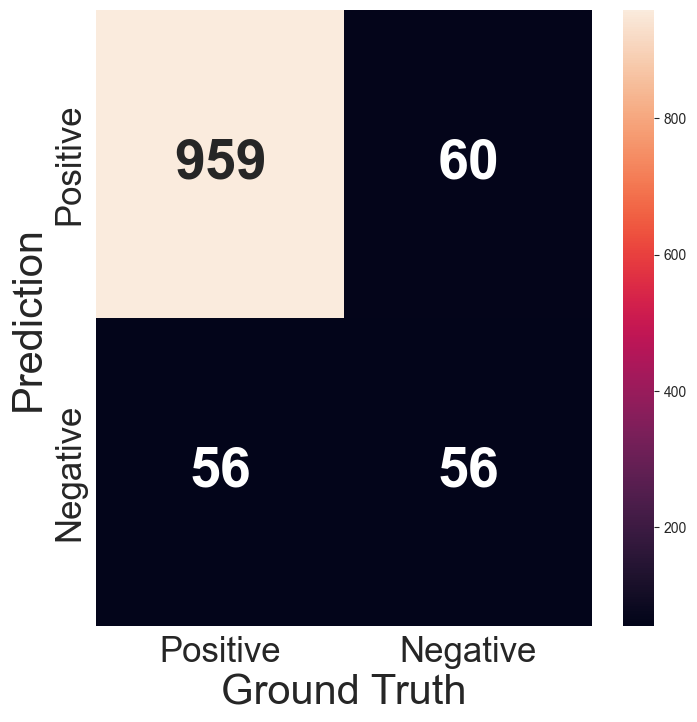

In [23]:
best1 = search.best_estimator_
pred = best1.predict(X_test)
get_scores(pred,y_test,best1)

In [24]:
GBC = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

search = GridSearchCV(estimator=GBC, param_grid=param_grid_gb,scoring="accuracy",cv=3, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

for model: 


GradientBoostingClassifier(max_depth=7, min_samples_leaf=4, n_estimators=300,
                           random_state=42, subsample=0.8)

Precision: 0.8936165301206918
Recall: 0.8947833775419982
F-score: 0.8941896434182703
Accuracy: 0.8947833775419982


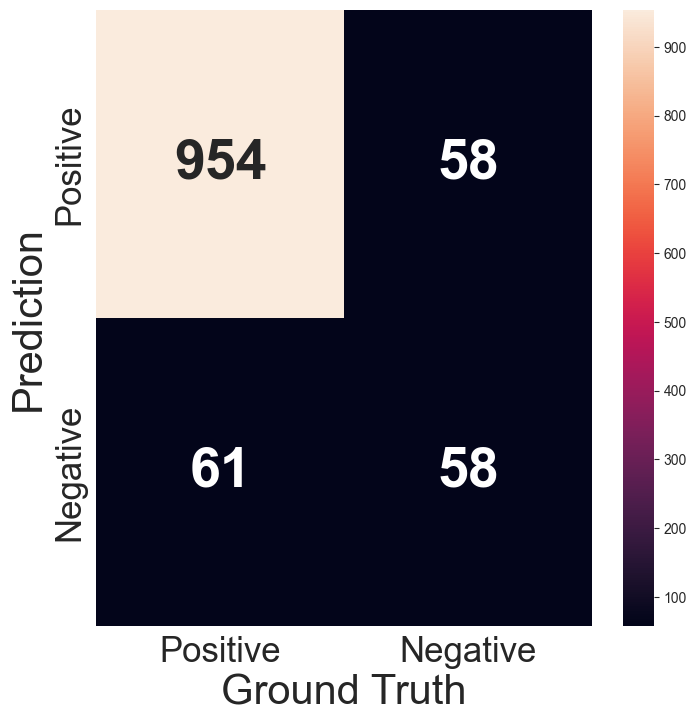

In [25]:
best2 = search.best_estimator_
pred = best2.predict(X_test)
get_scores(pred,y_test,best2)

In [26]:
xgc_cv = XGBClassifier(objective='binary:logistic',random_state=42)

param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

search = GridSearchCV(estimator=xgc_cv, param_grid=param_grid_xgb,scoring="accuracy",cv=3, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

for model: 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Precision: 0.8928810982913242
Recall: 0.8947833775419982
F-score: 0.893803394623027
Accuracy: 0.8947833775419982


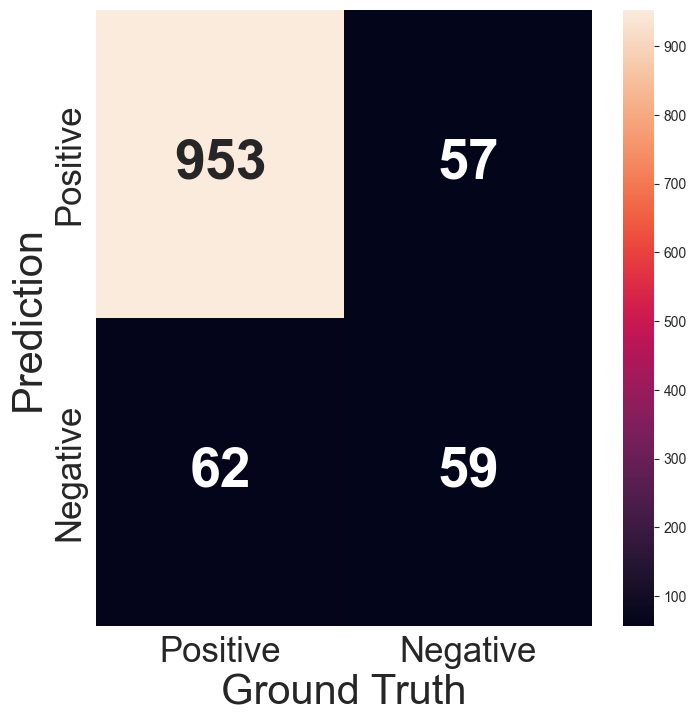

In [27]:
best3 = search.best_estimator_
pred = best3.predict(X_test)
get_scores(pred,y_test,best3)

In [28]:
cat = CatBoostClassifier(random_state = 42)

param_grid_cat = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300],
    'border_count': [32, 50, 100]
}

search = GridSearchCV(estimator=cat,param_grid=param_grid_cat,scoring='accuracy',cv=3, n_jobs=2)
search.fit(X_train, y_train)

0:	learn: 0.5955393	total: 144ms	remaining: 28.7s
1:	learn: 0.5149441	total: 149ms	remaining: 14.7s
2:	learn: 0.4683414	total: 153ms	remaining: 10s
3:	learn: 0.4325877	total: 157ms	remaining: 7.7s
4:	learn: 0.3958439	total: 161ms	remaining: 6.3s
5:	learn: 0.3735422	total: 165ms	remaining: 5.35s
6:	learn: 0.3490604	total: 169ms	remaining: 4.66s
7:	learn: 0.3307486	total: 172ms	remaining: 4.14s
8:	learn: 0.3162631	total: 176ms	remaining: 3.73s
9:	learn: 0.3044920	total: 179ms	remaining: 3.4s
10:	learn: 0.2954005	total: 183ms	remaining: 3.14s
11:	learn: 0.2850745	total: 186ms	remaining: 2.92s
12:	learn: 0.2778912	total: 190ms	remaining: 2.73s
13:	learn: 0.2705359	total: 193ms	remaining: 2.57s
14:	learn: 0.2601429	total: 197ms	remaining: 2.43s
15:	learn: 0.2551492	total: 200ms	remaining: 2.3s
16:	learn: 0.2486141	total: 204ms	remaining: 2.19s
17:	learn: 0.2448577	total: 207ms	remaining: 2.09s
18:	learn: 0.2389285	total: 211ms	remaining: 2.01s
19:	learn: 0.2339916	total: 214ms	remaining: 1.

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002973BE52D10>,
             n_jobs=2,
             param_grid={'border_count': [32, 50, 100], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

for model: 


Precision: 0.8895423640964664
Recall: 0.8903625110521662
F-score: 0.8899480366527908
Accuracy: 0.8903625110521662


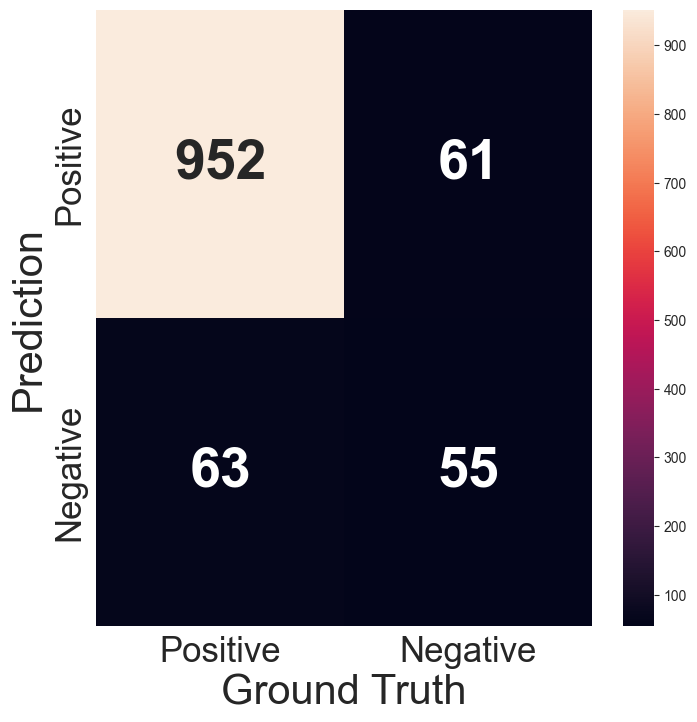

In [29]:
best4 = search.best_estimator_
pred = best4.predict(X_test)
get_scores(pred,y_test,best4)

# Stacking

Let us check if stacking 3 classification models could result in better results.

In [30]:
estimators = [('HGBC',best1),
              ('GBC',best2),
              ('XGBC', best3)]
estimators

[('HGBC',
  HistGradientBoostingClassifier(max_depth=10, max_iter=300, max_leaf_nodes=50,
                                 random_state=42)),
 ('GBC',
  GradientBoostingClassifier(max_depth=7, min_samples_leaf=4, n_estimators=300,
                             random_state=42, subsample=0.8)),
 ('XGBC',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=1.0, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=1, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=300, n_

0:	learn: 0.5330321	total: 2.2ms	remaining: 437ms
1:	learn: 0.4210489	total: 4.29ms	remaining: 425ms
2:	learn: 0.3524929	total: 5.93ms	remaining: 389ms
3:	learn: 0.3055577	total: 8.02ms	remaining: 393ms
4:	learn: 0.2712097	total: 10.2ms	remaining: 397ms
5:	learn: 0.2467221	total: 12.3ms	remaining: 398ms
6:	learn: 0.2283896	total: 14.4ms	remaining: 396ms
7:	learn: 0.2149720	total: 16.4ms	remaining: 394ms
8:	learn: 0.2058980	total: 18.5ms	remaining: 392ms
9:	learn: 0.1997725	total: 20.5ms	remaining: 390ms
10:	learn: 0.1949831	total: 22.6ms	remaining: 388ms
11:	learn: 0.1902678	total: 24.7ms	remaining: 387ms
12:	learn: 0.1858866	total: 27.1ms	remaining: 389ms
13:	learn: 0.1832623	total: 29.2ms	remaining: 388ms
14:	learn: 0.1807316	total: 31.5ms	remaining: 388ms
15:	learn: 0.1789411	total: 33.5ms	remaining: 385ms
16:	learn: 0.1773473	total: 35.6ms	remaining: 383ms
17:	learn: 0.1756377	total: 37.7ms	remaining: 381ms
18:	learn: 0.1742045	total: 39.8ms	remaining: 379ms
19:	learn: 0.1731488	to

StackingClassifier(estimators=[('HGBC',
                                HistGradientBoostingClassifier(max_depth=10,
                                                               max_iter=300,
                                                               max_leaf_nodes=50,
                                                               random_state=42)),
                               ('GBC',
                                GradientBoostingClassifier(max_depth=7,
                                                           min_samples_leaf=4,
                                                           n_estimators=300,
                                                           random_state=42,
                                                           subsample=0.8)),
                               ('XGBC',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynod...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x000002973BE28990>)

Precision: 0.9124002038389672
Recall: 0.8903625110521662
F-score: 0.90009289558495
Accuracy: 0.8903625110521662


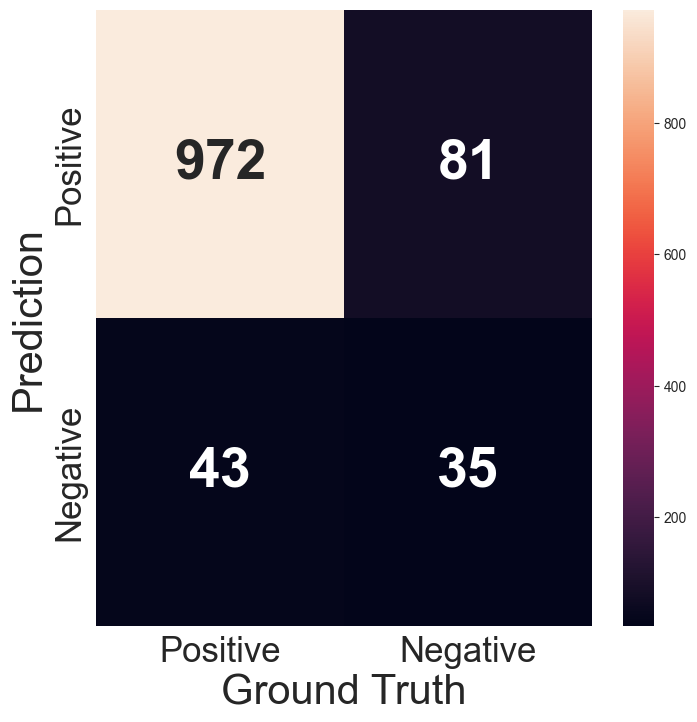

In [31]:
clf = StackingClassifier( estimators=estimators, final_estimator=best4)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
get_scores(pred,y_test,clf)

## Plotting accuracy

In [32]:
acc_cat = accuracy_score(y_test,best4.predict(X_test))
acc_hgbc = accuracy_score(y_test,best1.predict(X_test))
acc_gbc = accuracy_score(y_test,best2.predict(X_test))
acc_xgbc = accuracy_score(y_test,best3.predict(X_test))

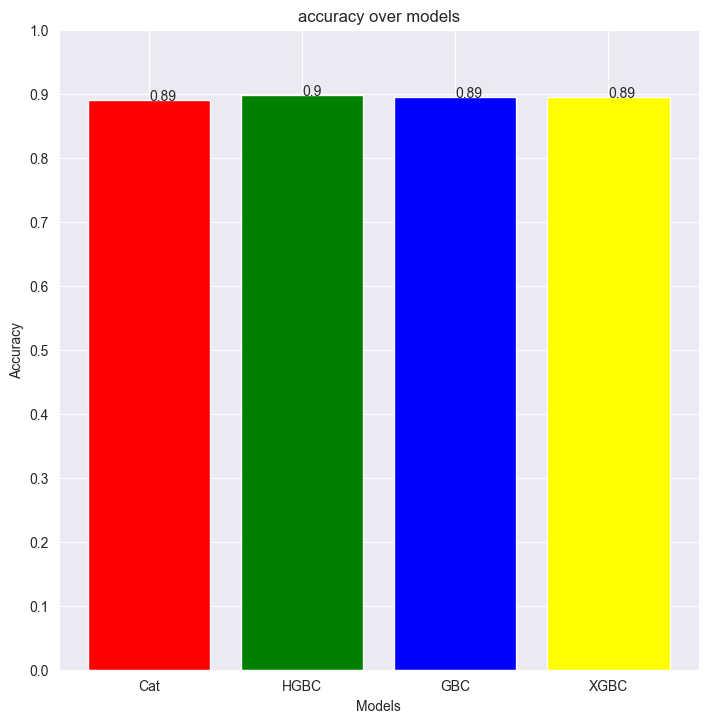

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.bar(range(4),height=[acc_cat, acc_hgbc, acc_gbc, acc_xgbc], color=['red','green','blue','yellow'])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('accuracy over models')
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xticklabels(['Cat', 'HGBC', 'GBC', 'XGBC'])
for i,j in enumerate([acc_cat, acc_hgbc, acc_gbc, acc_xgbc]):
    plt.text(i,j,np.round(j,2))
plt.show()

## 10-fold cross validation 

In [34]:
def plot_accuracy_CV(name: str, model: object, cv = 10) -> list:
    
    
    acc_list = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print('for model:\n', model)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (acc_list.mean(), acc_list.std()))
    
    plt.figure(figsize=(8,8))
    plt.plot(np.arange(cv), acc_list, 'ro-')
    plt.title('cross validation accuracy for model: '+name)
    plt.xlabel('cross validation splits')
    plt.ylabel('accuracy')
    plt.show()
    
    return acc_list


for model:
 HistGradientBoostingClassifier(max_depth=10, max_iter=300, max_leaf_nodes=50,
                               random_state=42)
0.90 accuracy with a standard deviation of 0.01


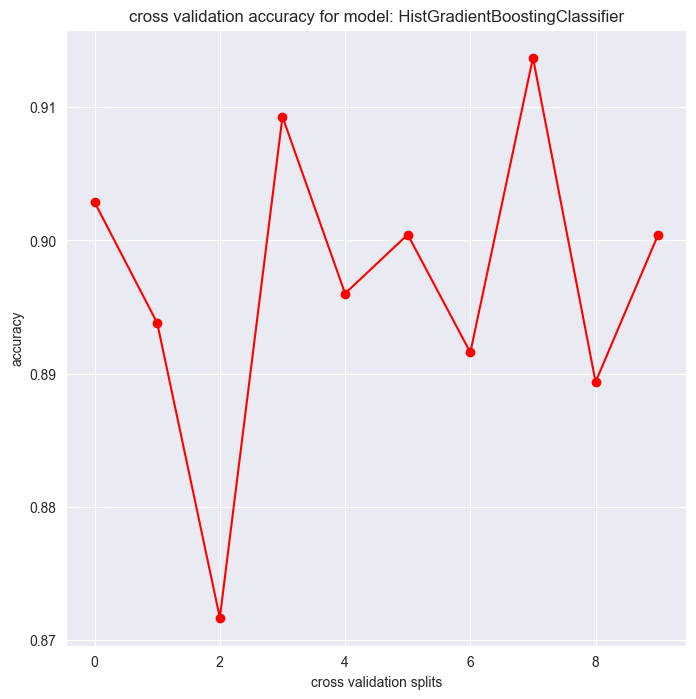

for model:
 GradientBoostingClassifier(max_depth=7, min_samples_leaf=4, n_estimators=300,
                           random_state=42, subsample=0.8)
0.90 accuracy with a standard deviation of 0.01


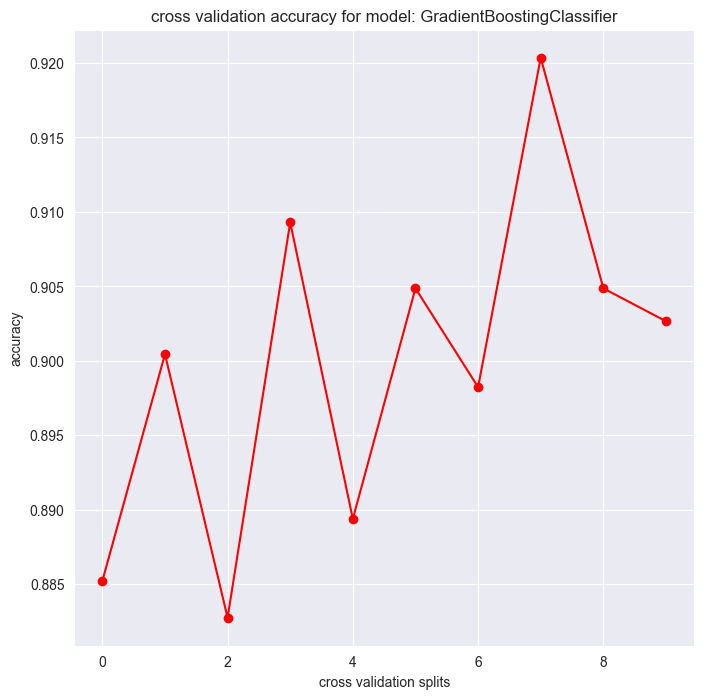

for model:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.90 accuracy with a standard deviation of 0.01


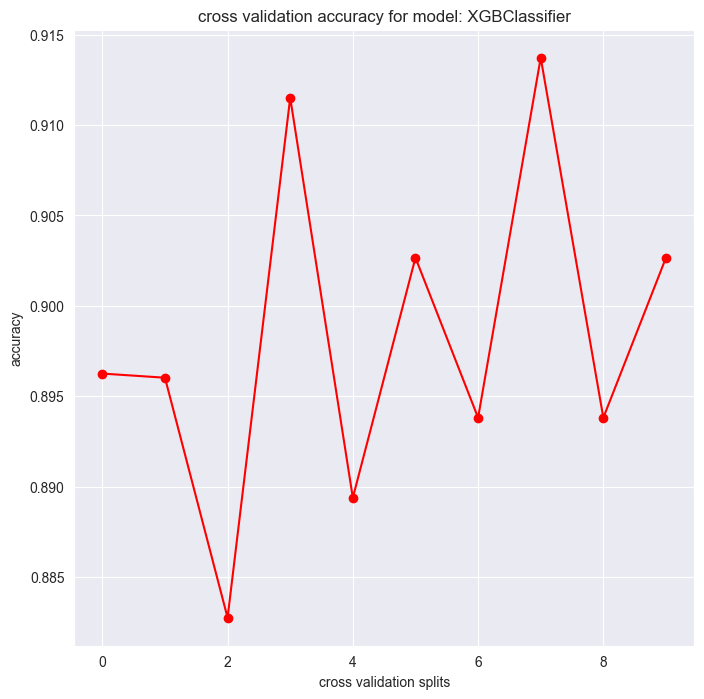

0:	learn: 0.5784642	total: 3.75ms	remaining: 747ms
1:	learn: 0.4938079	total: 7.17ms	remaining: 710ms
2:	learn: 0.4380931	total: 10ms	remaining: 659ms
3:	learn: 0.3927151	total: 13.2ms	remaining: 648ms
4:	learn: 0.3548325	total: 16.6ms	remaining: 649ms
5:	learn: 0.3327648	total: 18.3ms	remaining: 591ms
6:	learn: 0.3116009	total: 21.5ms	remaining: 592ms
7:	learn: 0.2957887	total: 25.6ms	remaining: 615ms
8:	learn: 0.2768972	total: 29.2ms	remaining: 619ms
9:	learn: 0.2614502	total: 32.6ms	remaining: 619ms
10:	learn: 0.2526031	total: 36ms	remaining: 619ms
11:	learn: 0.2458556	total: 39.3ms	remaining: 615ms
12:	learn: 0.2377950	total: 42.6ms	remaining: 613ms
13:	learn: 0.2340659	total: 46.3ms	remaining: 615ms
14:	learn: 0.2298408	total: 49.6ms	remaining: 611ms
15:	learn: 0.2258068	total: 53.1ms	remaining: 610ms
16:	learn: 0.2228791	total: 56.5ms	remaining: 609ms
17:	learn: 0.2197833	total: 60.2ms	remaining: 609ms
18:	learn: 0.2164127	total: 63.7ms	remaining: 607ms
19:	learn: 0.2115844	total

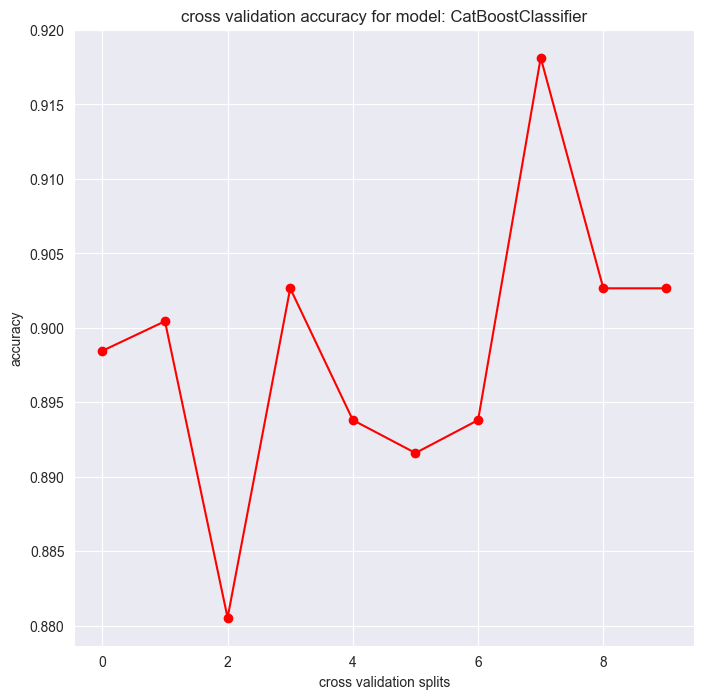

In [35]:
acc_list_HGBC: list = plot_accuracy_CV('HistGradientBoostingClassifier', best1)
acc_list_GBC: list =plot_accuracy_CV('GradientBoostingClassifier', best2)
acc_list_XGBC: list =plot_accuracy_CV('XGBClassifier', best3)
acc_list_CatC: list =plot_accuracy_CV('CatBoostClassifier', best4)

In [36]:
acc_list_GBC

array([0.88520971, 0.90044248, 0.88274336, 0.90929204, 0.88938053,
       0.90486726, 0.89823009, 0.92035398, 0.90486726, 0.90265487])

In [37]:
data_frame_acc = pd.DataFrame(columns=['Name', 'Score', 'Split'])
data_frame_acc

,Name,Score,Split


In [38]:

names = ['HGBC', 'GBC', 'XGBC', 'CatC']
splits = np.arange(10)
combined_acc_list = [acc_list_HGBC, acc_list_GBC, acc_list_XGBC, acc_list_CatC]

for name in names:
    for l in combined_acc_list:
        for split in splits:
            dic = {'Name': name, 'Score': l[split], 'Split': split}
            data_frame_acc.loc[len(data_frame_acc)] = dic 
            data_frame_acc.reset_index()
            
display(data_frame_acc)

,Name,Score,Split
0,HGBC,0.902870,0
1,HGBC,0.893805,1
2,HGBC,0.871681,2
3,HGBC,0.909292,3
4,HGBC,0.896018,4
...,...,...,...
155,CatC,0.891593,5
156,CatC,0.893805,6
157,CatC,0.918142,7
158,CatC,0.902655,8


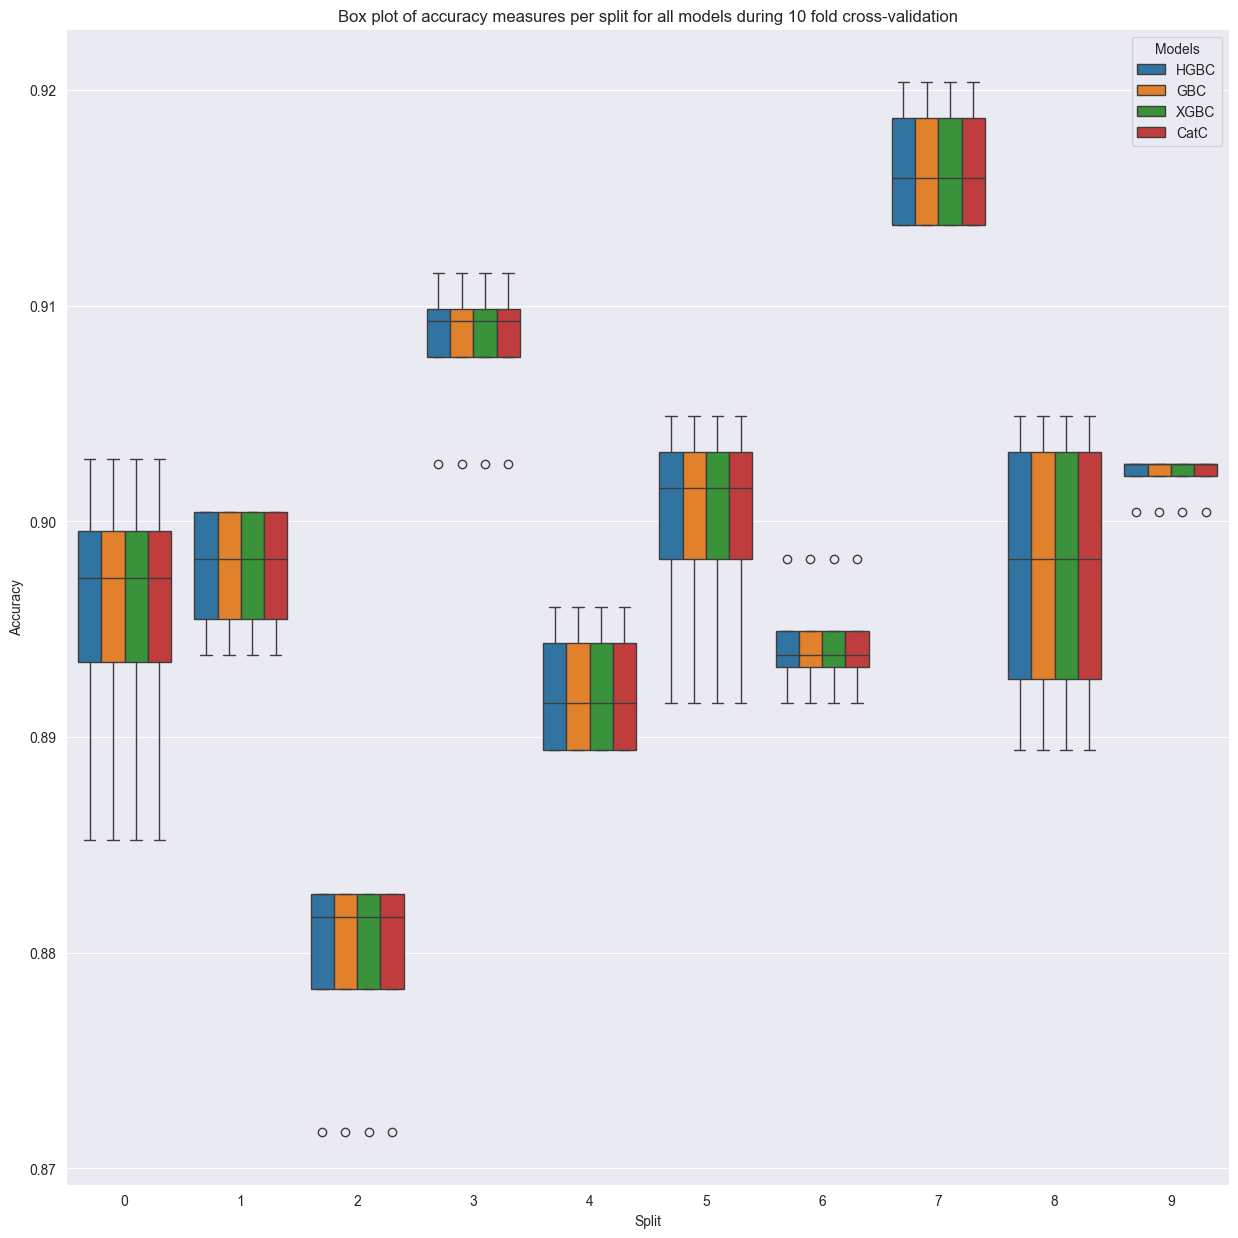

In [39]:
plt.figure(figsize=(15, 15))
ax = sns.boxplot(x='Split', y='Score', hue='Name', data=data_frame_acc)
ax.spines[['top', 'right']].set_visible(False)
ax.set(ylabel='Accuracy', title='Box plot of accuracy measures per split for all models during 10 fold cross-validation')
ax.legend(title='Models')
plt.show()

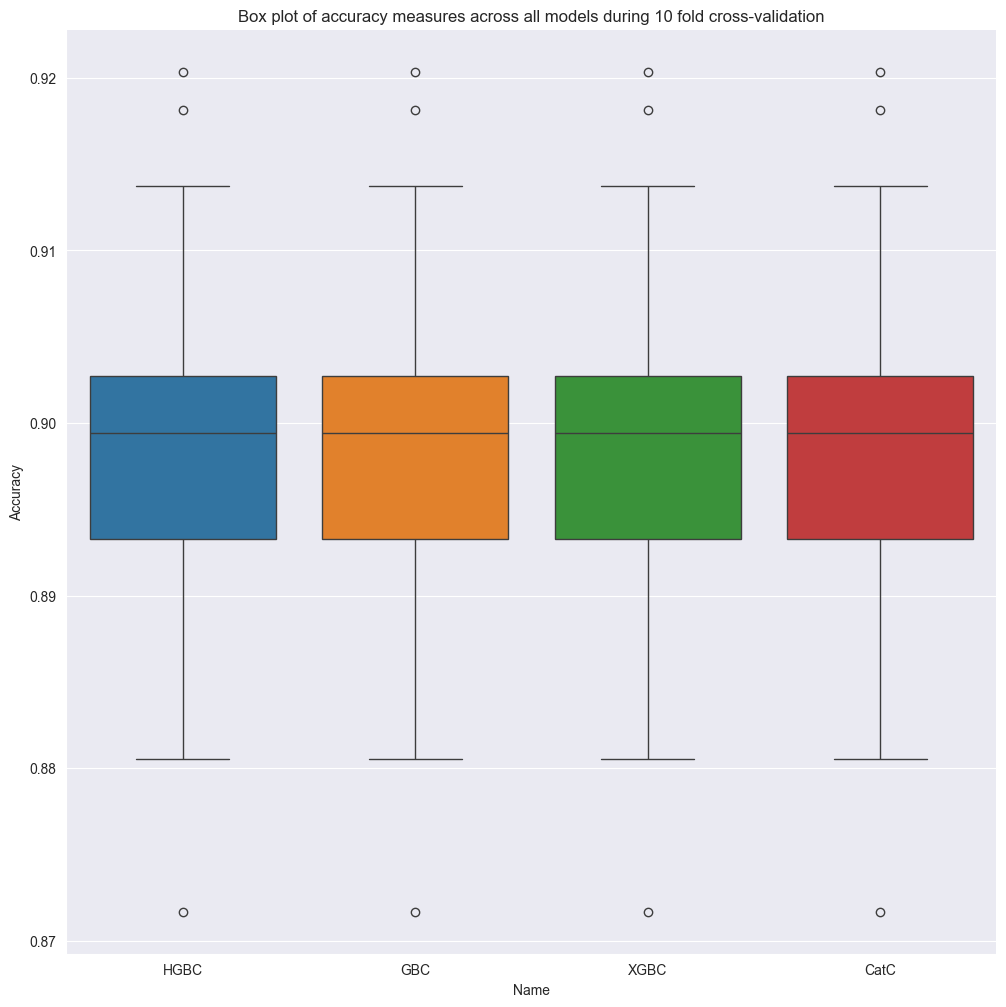

In [40]:
plt.figure(figsize=(12, 12))
ax = sns.boxplot(x='Name', y='Score', data=data_frame_acc, hue='Name')
ax.spines[['top', 'right']].set_visible(False)
ax.set(ylabel='Accuracy', title='Box plot of accuracy measures across all models during 10 fold cross-validation')
plt.show()